<p style="text-align: center;">


<font size='5'><strong> DESAFIO  </strong></font>
</p>

<br>   
 <img src="mercado_livre_1.png" >

<br>


<font size='5'>
<strong>Tema</strong>: Construir um modelo de aprendizado de máquina para prever a próxima compra de um usuário com base em seu histórico de navegação.<p>

<h2> Este desafio foi desenvolvido utilizando a biblioteca automatizada de Machine Learning do pycaret. </h2>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <a  href = https://pycaret.org/>  Pycaret</a>
       
   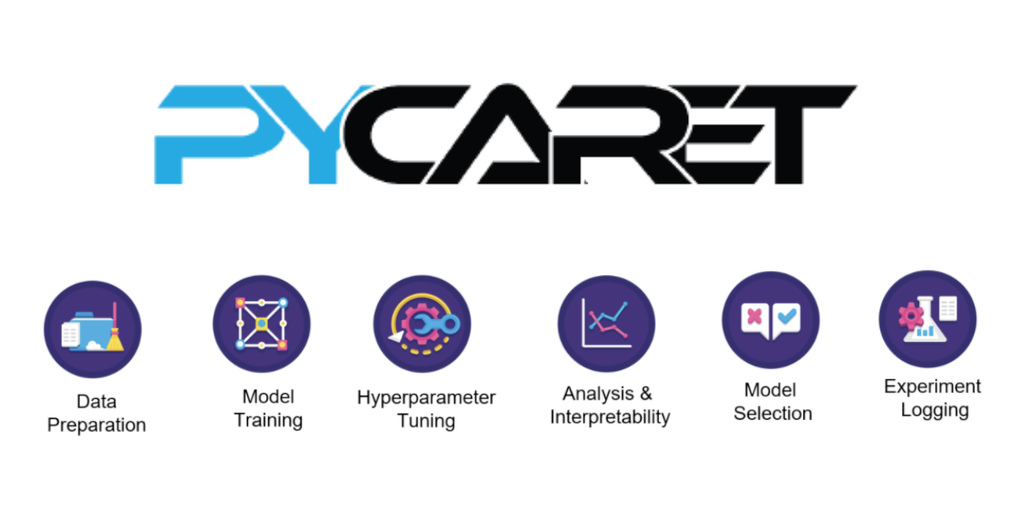


#### 1.0 Importando as Bibliotecas

In [1]:
#pip install pycaret[full]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpim
import scipy.stats as st
from scipy import stats
from statsmodels.formula.api  import ols
%matplotlib inline
from pycaret.regression import *
from pycaret.datasets import get_data
import seaborn as sns
from pycaret.utils import check_metric

#### 1.1 Fazendo a leitura do dataset 

In [3]:
train = pd.read_json('train_dataset.jl',  lines= True)

#### 1.2 Desmembrando o dicionário da coluna user_history criando um dataFrame

In [4]:
train_1 = pd.DataFrame(train.assign(user =train['user_history'].str.split(';')).explode('user_history'))
train_1.head()

,user_history,item_bought,user
0,"{'event_info': 1786148, 'event_timestamp': '20...",1748830,NaN
0,"{'event_info': 1786148, 'event_timestamp': '20...",1748830,NaN
0,"{'event_info': 'RELOGIO SMARTWATCH', 'event_ti...",1748830,NaN
0,"{'event_info': 1615991, 'event_timestamp': '20...",1748830,NaN
0,"{'event_info': 1615991, 'event_timestamp': '20...",1748830,NaN


In [5]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999166 entries, 0 to 413162
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_history  object 
 1   item_bought   int64  
 2   user          float64
dtypes: float64(1), int64(1), object(1)
memory usage: 366.2+ MB


##### 1.2.1 Limitando a leitura da variável ao limite de 500000 linhas

In [6]:
train = train_1.iloc[:100000]
train.head()

,user_history,item_bought,user
0,"{'event_info': 1786148, 'event_timestamp': '20...",1748830,NaN
0,"{'event_info': 1786148, 'event_timestamp': '20...",1748830,NaN
0,"{'event_info': 'RELOGIO SMARTWATCH', 'event_ti...",1748830,NaN
0,"{'event_info': 1615991, 'event_timestamp': '20...",1748830,NaN
0,"{'event_info': 1615991, 'event_timestamp': '20...",1748830,NaN


In [7]:
train_test = train_1.iloc[300000:500000]
train_test.head()

,user_history,item_bought,user
10252,"{'event_info': 949471, 'event_timestamp': '201...",806452,NaN
10252,"{'event_info': 806452, 'event_timestamp': '201...",806452,NaN
10252,"{'event_info': 806452, 'event_timestamp': '201...",806452,NaN
10252,"{'event_info': 'MI BAND 4', 'event_timestamp':...",806452,NaN
10252,"{'event_info': 1473829, 'event_timestamp': '20...",806452,NaN


In [8]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 10252 to 17156
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_history  200000 non-null  object 
 1   item_bought   200000 non-null  int64  
 2   user          0 non-null       float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.1+ MB


##### 1.2.3 Dismembrando event_info, event_type e event_timestamp em colunas

In [9]:
df_train_user = train['user_history'].apply(pd.Series)

In [10]:
df_train_user.head()

,event_info,event_timestamp,event_type
0,1786148,2019-10-19T11:25:42.444-0400,view
0,1786148,2019-10-19T11:25:57.487-0400,view
0,RELOGIO SMARTWATCH,2019-10-19T11:26:07.063-0400,search
0,1615991,2019-10-19T11:27:26.879-0400,view
0,1615991,2019-10-19T11:28:36.558-0400,view


In [11]:
df_train_user_1 = train_test['user_history'].apply(pd.Series)

In [12]:
df_train_user_1.head()

,event_info,event_timestamp,event_type
10252,949471,2019-10-13T02:26:19.418-0400,view
10252,806452,2019-10-13T02:26:22.538-0400,view
10252,806452,2019-10-13T10:25:01.944-0400,view
10252,MI BAND 4,2019-10-13T10:49:39.700-0400,search
10252,1473829,2019-10-13T10:50:02.359-0400,view


##### 1.3 Unindo a variável  df_train_v a variável df_train_user

In [13]:
train.head()

,user_history,item_bought,user
0,"{'event_info': 1786148, 'event_timestamp': '20...",1748830,NaN
0,"{'event_info': 1786148, 'event_timestamp': '20...",1748830,NaN
0,"{'event_info': 'RELOGIO SMARTWATCH', 'event_ti...",1748830,NaN
0,"{'event_info': 1615991, 'event_timestamp': '20...",1748830,NaN
0,"{'event_info': 1615991, 'event_timestamp': '20...",1748830,NaN


In [14]:
train = pd.concat([df_train_user, train], axis = 1).drop(columns=['user_history', 'user' ])


In [15]:
train.tail()

,event_info,event_timestamp,event_type,item_bought
3480,1287991,2019-09-29T14:20:31.378-0400,view,1654789
3480,TENIS LACOSTES HOMBRE BLANCOS,2019-09-29T14:20:32.877-0400,search,1654789
3481,435777,2019-10-13T21:53:48.499-0400,view,1336002
3481,563656,2019-10-13T21:54:05.463-0400,view,1336002
3481,1664365,2019-10-13T21:54:23.455-0400,view,1336002


In [16]:
train_test = pd.concat([df_train_user_1, train_test], axis = 1).drop(columns=['user_history', 'user' ])
train_test.head()

,event_info,event_timestamp,event_type,item_bought
10252,949471,2019-10-13T02:26:19.418-0400,view,806452
10252,806452,2019-10-13T02:26:22.538-0400,view,806452
10252,806452,2019-10-13T10:25:01.944-0400,view,806452
10252,MI BAND 4,2019-10-13T10:49:39.700-0400,search,806452
10252,1473829,2019-10-13T10:50:02.359-0400,view,806452


#### 1.3.1 Extraindo data e a hora da coluna event_timestamp

In [17]:
train.event_timestamp =pd.to_datetime(train['event_timestamp'])
train['Day']= train['event_timestamp'].dt.day
train['Month']= train['event_timestamp'].dt.month
train['year']= train['event_timestamp'].dt.year
train['Hours']= train['event_timestamp'].dt.hour
train['Minutes']= train['event_timestamp'].dt.minute
train

,event_info,event_timestamp,event_type,item_bought,Day,Month,year,Hours,Minutes
0,1786148,2019-10-19 11:25:42.444000-04:00,view,1748830,19,10,2019,11,25
0,1786148,2019-10-19 11:25:57.487000-04:00,view,1748830,19,10,2019,11,25
0,RELOGIO SMARTWATCH,2019-10-19 11:26:07.063000-04:00,search,1748830,19,10,2019,11,26
0,1615991,2019-10-19 11:27:26.879000-04:00,view,1748830,19,10,2019,11,27
0,1615991,2019-10-19 11:28:36.558000-04:00,view,1748830,19,10,2019,11,28
...,...,...,...,...,...,...,...,...,...
3480,1287991,2019-09-29 14:20:31.378000-04:00,view,1654789,29,9,2019,14,20
3480,TENIS LACOSTES HOMBRE BLANCOS,2019-09-29 14:20:32.877000-04:00,search,1654789,29,9,2019,14,20
3481,435777,2019-10-13 21:53:48.499000-04:00,view,1336002,13,10,2019,21,53
3481,563656,2019-10-13 21:54:05.463000-04:00,view,1336002,13,10,2019,21,54


In [18]:
train_test.event_timestamp =pd.to_datetime(train_test['event_timestamp'])
train_test['Day']= train_test['event_timestamp'].dt.day
train_test['Month']= train_test['event_timestamp'].dt.month
train_test['year']= train_test['event_timestamp'].dt.year
train_test['Hours']= train_test['event_timestamp'].dt.hour
train_test['Minutes']= train_test['event_timestamp'].dt.minute
train_test.head()

,event_info,event_timestamp,event_type,item_bought,Day,Month,year,Hours,Minutes
10252,949471,2019-10-13 02:26:19.418000-04:00,view,806452,13,10,2019,2,26
10252,806452,2019-10-13 02:26:22.538000-04:00,view,806452,13,10,2019,2,26
10252,806452,2019-10-13 10:25:01.944000-04:00,view,806452,13,10,2019,10,25
10252,MI BAND 4,2019-10-13 10:49:39.700000-04:00,search,806452,13,10,2019,10,49
10252,1473829,2019-10-13 10:50:02.359000-04:00,view,806452,13,10,2019,10,50


#### 1.3.2 Excluindo a coluna event_timestamp, pois ela foi desmembrada

In [19]:
train = train.drop('event_timestamp', axis=1)
train.head()

,event_info,event_type,item_bought,Day,Month,year,Hours,Minutes
0,1786148,view,1748830,19,10,2019,11,25
0,1786148,view,1748830,19,10,2019,11,25
0,RELOGIO SMARTWATCH,search,1748830,19,10,2019,11,26
0,1615991,view,1748830,19,10,2019,11,27
0,1615991,view,1748830,19,10,2019,11,28


In [20]:
train_test = train_test.drop('event_timestamp', axis=1)
train_test.head()

,event_info,event_type,item_bought,Day,Month,year,Hours,Minutes
10252,949471,view,806452,13,10,2019,2,26
10252,806452,view,806452,13,10,2019,2,26
10252,806452,view,806452,13,10,2019,10,25
10252,MI BAND 4,search,806452,13,10,2019,10,49
10252,1473829,view,806452,13,10,2019,10,50


#### 1.4 Fazendo a leitura do dataset de test

In [21]:
df_test =  pd.read_json('test_dataset.jl',  lines= True)

##### 1.5 Desmembrando o dicionário da coluna user_history criando um dataFrame


In [22]:
test = pd.DataFrame(df_test.assign(user =df_test['user_history'].str.split(';')).explode('user_history'))
test.head()


,user_history,user
0,"{'event_info': 1572239, 'event_timestamp': '20...",NaN
0,"{'event_info': 1572239, 'event_timestamp': '20...",NaN
0,"{'event_info': 1572239, 'event_timestamp': '20...",NaN
0,"{'event_info': 1572239, 'event_timestamp': '20...",NaN
0,"{'event_info': 1572239, 'event_timestamp': '20...",NaN


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5187754 entries, 0 to 177069
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_history  object 
 1   user          float64
dtypes: float64(1), object(1)
memory usage: 118.7+ MB


##### 1.5.1 limitando a leitura da variável ao limite de 500000 linhas


In [24]:
 test = test.iloc[:500000]

##### 1.5.2 Transformando event_info, event_type e event_timestamp em colunas¶

In [25]:
df_test_user =  test['user_history'].apply(pd.Series)

In [26]:
df_test_user.head()

,event_info,event_timestamp,event_type
0,1572239,2019-09-26T18:31:47.705-0400,view
0,1572239,2019-09-26T18:35:04.724-0400,view
0,1572239,2019-09-26T18:37:35.532-0400,view
0,1572239,2019-09-26T18:38:54.680-0400,view
0,1572239,2019-09-26T18:40:26.904-0400,view


In [27]:
df_test_user.event_timestamp =pd.to_datetime(df_test_user['event_timestamp'])
df_test_user['Day']= df_test_user['event_timestamp'].dt.day
df_test_user['Month']= df_test_user['event_timestamp'].dt.month
df_test_user['year']=df_test_user['event_timestamp'].dt.year
df_test_user['Hours']= df_test_user['event_timestamp'].dt.hour
df_test_user['Minutes']= df_test_user['event_timestamp'].dt.minute
df_test_user.head()

,event_info,event_timestamp,event_type,Day,Month,year,Hours,Minutes
0,1572239,2019-09-26 18:31:47.705000-04:00,view,26,9,2019,18,31
0,1572239,2019-09-26 18:35:04.724000-04:00,view,26,9,2019,18,35
0,1572239,2019-09-26 18:37:35.532000-04:00,view,26,9,2019,18,37
0,1572239,2019-09-26 18:38:54.680000-04:00,view,26,9,2019,18,38
0,1572239,2019-09-26 18:40:26.904000-04:00,view,26,9,2019,18,40


In [28]:
test = df_test_user.drop(columns=['event_timestamp'])
test.head()

,event_info,event_type,Day,Month,year,Hours,Minutes
0,1572239,view,26,9,2019,18,31
0,1572239,view,26,9,2019,18,35
0,1572239,view,26,9,2019,18,37
0,1572239,view,26,9,2019,18,38
0,1572239,view,26,9,2019,18,40


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 16693
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   event_info  500000 non-null  object
 1   event_type  500000 non-null  object
 2   Day         500000 non-null  int64 
 3   Month       500000 non-null  int64 
 4   year        500000 non-null  int64 
 5   Hours       500000 non-null  int64 
 6   Minutes     500000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 30.5+ MB


##### 1.6.1 limitando a leitura da variável ao limite de 500000 linhas

#####  Fazendo alteração do tipo da coluna event_info

In [30]:
train_2 = train[['event_info','event_type']].astype('string')

In [31]:
train_3 = train_test[['event_info','event_type']].astype('string')

In [32]:
#train =train['event_info'].astype(str)

In [33]:
train_2.rename(columns= {'event_info':'item_id', 'event_type': 'event_type_1'}, inplace=True)
train_2.head()

,item_id,event_type_1
0,1786148,view
0,1786148,view
0,RELOGIO SMARTWATCH,search
0,1615991,view
0,1615991,view


In [34]:
train_3.rename(columns= {'event_info':'item_id', 'event_type': 'event_type_1'}, inplace=True)
train_3.head()

,item_id,event_type_1
10252,949471,view
10252,806452,view
10252,806452,view
10252,MI BAND 4,search
10252,1473829,view


In [35]:
train = pd.concat([train_2, train], axis = 1).drop(columns =["event_info", "event_type"], axis=1)
train.head()

,item_id,event_type_1,item_bought,Day,Month,year,Hours,Minutes
0,1786148,view,1748830,19,10,2019,11,25
0,1786148,view,1748830,19,10,2019,11,25
0,RELOGIO SMARTWATCH,search,1748830,19,10,2019,11,26
0,1615991,view,1748830,19,10,2019,11,27
0,1615991,view,1748830,19,10,2019,11,28


In [36]:
train_test = pd.concat([train_3, train_test], axis = 1).drop(columns =["event_info", "event_type"], axis=1)
train_test.head()

,item_id,event_type_1,item_bought,Day,Month,year,Hours,Minutes
10252,949471,view,806452,13,10,2019,2,26
10252,806452,view,806452,13,10,2019,2,26
10252,806452,view,806452,13,10,2019,10,25
10252,MI BAND 4,search,806452,13,10,2019,10,49
10252,1473829,view,806452,13,10,2019,10,50


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 3481
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   item_id       100000 non-null  string
 1   event_type_1  100000 non-null  string
 2   item_bought   100000 non-null  int64 
 3   Day           100000 non-null  int64 
 4   Month         100000 non-null  int64 
 5   year          100000 non-null  int64 
 6   Hours         100000 non-null  int64 
 7   Minutes       100000 non-null  int64 
dtypes: int64(6), string(2)
memory usage: 6.9 MB


In [38]:
test_1 = test[['event_info','event_type']].astype('string')

In [39]:
test_1.rename(columns= {'event_info':'item_id', 'event_type': 'event_type_1'}, inplace=True)


In [40]:
test = pd.concat([test_1, test], axis = 1).drop(columns =["event_info", "event_type"], axis=1)
test.head()


,item_id,event_type_1,Day,Month,year,Hours,Minutes
0,1572239,view,26,9,2019,18,31
0,1572239,view,26,9,2019,18,35
0,1572239,view,26,9,2019,18,37
0,1572239,view,26,9,2019,18,38
0,1572239,view,26,9,2019,18,40


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 16693
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   item_id       500000 non-null  string
 1   event_type_1  500000 non-null  string
 2   Day           500000 non-null  int64 
 3   Month         500000 non-null  int64 
 4   year          500000 non-null  int64 
 5   Hours         500000 non-null  int64 
 6   Minutes       500000 non-null  int64 
dtypes: int64(5), string(2)
memory usage: 30.5 MB


#### Análise exploratória

In [42]:
def normal(df, col, threshold=0.05):
    try:
        zscore, p_value = stats.normaltest(df[col])
        if p_value < threshold:
            result = 'not_normal'
        else:
            result = 'normal'
    except:
        zscore = p_value = np.nan
        result = 'not_applicable'
    return result

def outliers_count_IQR(df, col):
    try:
        if len(df[col].unique())>2: # if para eliminar features binárias
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr_range = q3 - q1
            lower = q1 - 1.5*iqr_range
            upper = q3 + 1.5*iqr_range
            out_low = df[df[col] < lower].count()[0]
            out_up = df[df[col] > upper].count()[0]
            outliers = out_low + out_up
            outliers_perc = round(outliers / df.shape[0],2)
        else:
            outliers = np.nan
            outliers_perc = np.nan
    except:
        outliers = np.nan
        outliers_perc = np.nan
    return outliers, outliers_perc

def EDA_morestats(df):
    eda_df = {}
    eda_df['Amount_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Amount_Data'] = df.count()
    

 
    colunas = df.columns.tolist()
    
        
    eda_df['Amount_Unique'] = pd.Series(map(lambda x: len(df[x].unique().tolist()), colunas), index=colunas)
    
    eda_df['Mean'] = df.mean().round(3)
    eda_df['Min'] = df.min()
    eda_df['Max'] = df.max()
    eda_df['STD'] = df.std().round(3)
    eda_df['Normality'] = pd.Series(map(lambda x: normal(df, x), colunas), index=colunas)
    eda_df['Amount_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[0], colunas), index=colunas)
    eda_df['%_Outliers'] = pd.Series(map(lambda x: outliers_count_IQR(df, x)[1], colunas), index=colunas)
    df = pd.DataFrame(eda_df)
    return df.loc[colunas,:]


In [43]:
EDA_morestats(train[['Day', 'Month', 'year', 'Hours','Minutes', 'item_bought']])

,Amount_NaN,%_NaN,DType,Amount_Data,Amount_Unique,Mean,Min,Max,STD,Normality,Amount_Outliers,%_Outliers
Day,0,0.0,int64,100000,31,14.931,1,31,9.321,not_normal,0.0,0.0
Month,0,0.0,int64,100000,2,9.837,9,10,0.369,not_normal,NaN,NaN
year,0,0.0,int64,100000,1,2019.000,2019,2019,0.000,not_normal,NaN,NaN
Hours,0,0.0,int64,100000,24,14.526,0,23,5.675,not_normal,0.0,0.0
Minutes,0,0.0,int64,100000,60,29.660,0,59,17.489,not_normal,0.0,0.0
item_bought,0,0.0,int64,100000,3119,1059781.133,232,2100965,596442.691,not_normal,0.0,0.0


##### 2.1 Diistribuição das features através de um histograma -dataset_train

In [44]:

def Distribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 100000]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 4 * nGraphRow), dpi = 100, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 100)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 2.0)
    plt.show()

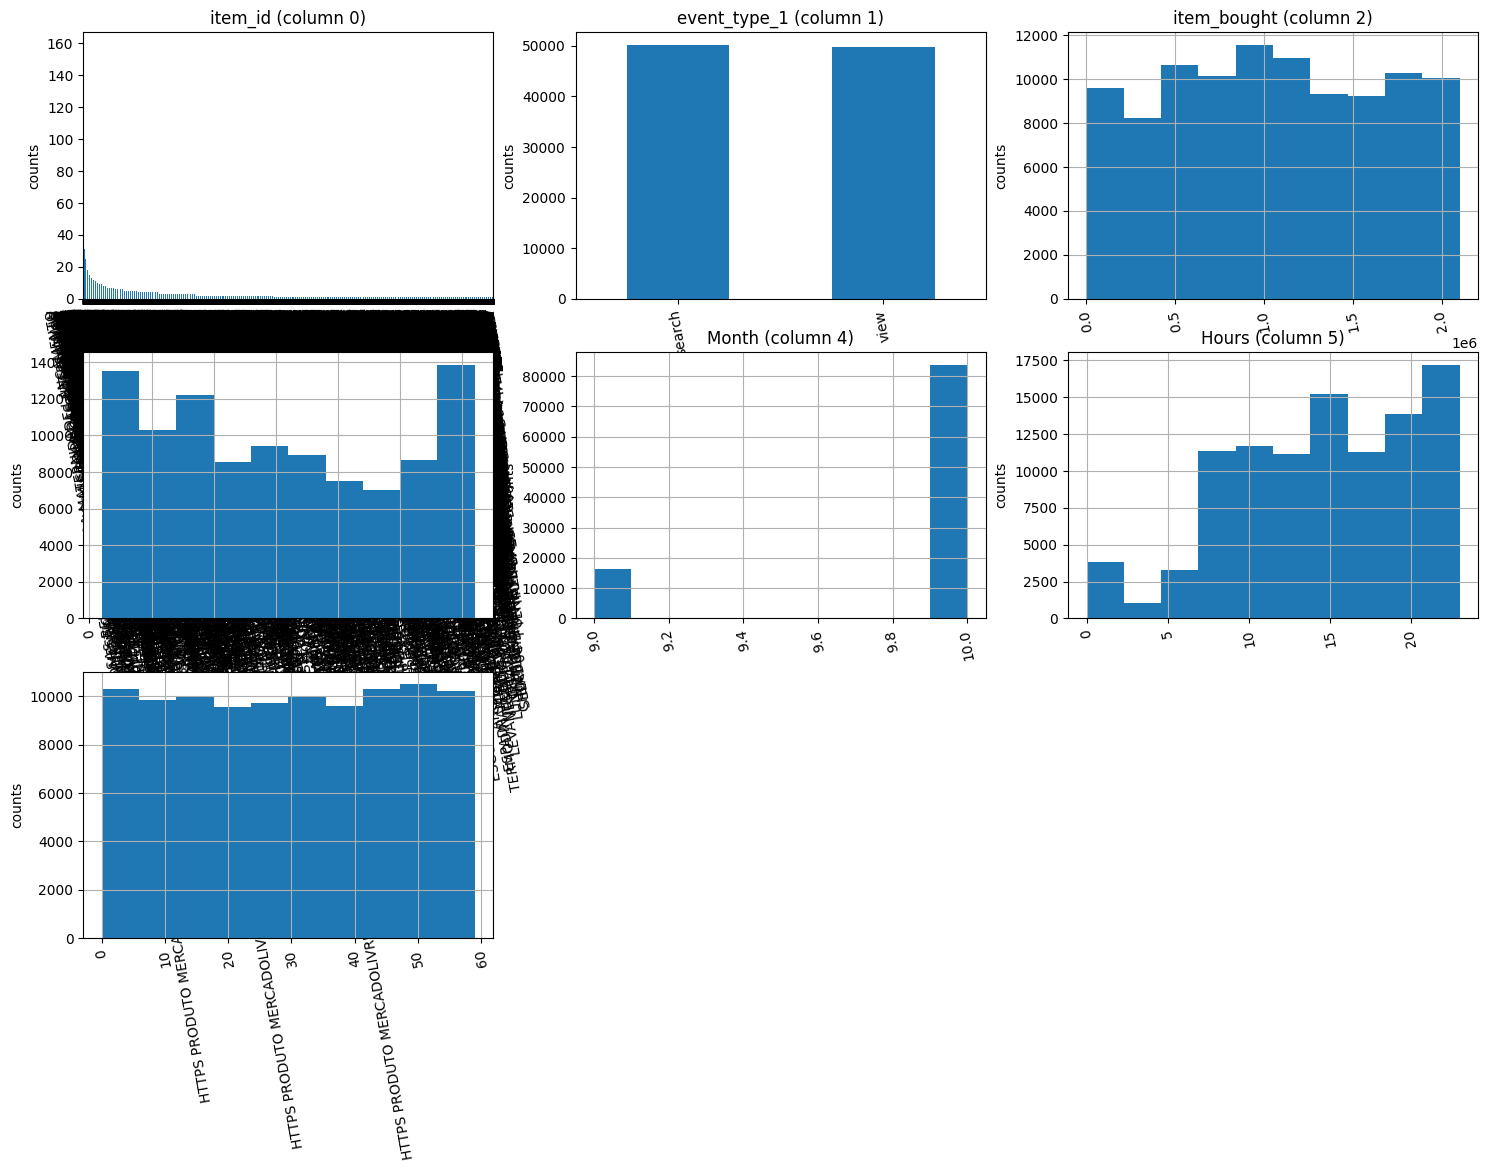

In [45]:
Distribution(train,20, 3)

In [46]:
df_analise = train[['item_bought', 'item_id', 'event_type_1']].groupby(['event_type_1', 'item_id']).count()
df_analise.sort_values('item_bought', ascending=False)

item_bought
event_type_1 item_id                               
search       CINTA MODELADORA FEMININA          159
             TENIS MASCULINO                    157
             RELOGIO SMARTWATCH                 122
             BEBE REBORN                        111
             REDMI NOTE 7                       103
...                                             ...
view         1543850                              1
             1543792                              1
             1543767                              1
             1543521                              1
             999983                               1

[37536 rows x 1 columns]

In [47]:
df_analise_1 = train[['item_bought', 'item_id', 'event_type_1', 'Day']].groupby(['event_type_1', 'Day', 'item_id']).count()
df_analise_1.sort_values('item_bought', ascending=False)

item_bought
event_type_1 Day item_id                               
search       14  BONECA REBORN                       66
             23  CINTA MODELADORA FEMININA           60
             6   MACAQUINHO FEMININO                 56
             20  TRALHA BOIA CHUMBO                  52
             16  CARTEIRA MASCULINA COURO            51
...                                                 ...
view         7   332856                               1
                 332686                               1
                 327885                               1
                 327450                               1
             31  993702                               1

[42772 rows x 1 columns]

In [48]:
df_analise_2 = train[['item_bought', 'item_id', 'event_type_1', 'Hours']].groupby(['event_type_1', 'Hours', 'item_id']).count()
df_analise_2.sort_values('item_bought', ascending=False)

item_bought
event_type_1 Hours item_id                               
search       12    CINTA MODELADORA FEMININA           59
             21    TENIS MASCULINO                     55
             9     MOCHILAS ESCOLARES                  51
             16    MALAS MATERNIDADE                   48
             13    ARMAS AIRSOFT                       45
...                                                   ...
view         10    59749                                1
                   59731                                1
                   595851                               1
                   595807                               1
             23    998807                               1

[45660 rows x 1 columns]

In [49]:
df_analise_3 = train[['item_bought', 'item_id', 'event_type_1', 'Day', 'Hours']].groupby(['event_type_1', 'Day', 'Hours', 'item_id']).count()
df_analise_3.sort_values('item_bought', ascending=False)

item_bought
event_type_1 Day Hours item_id                               
search       23  12    CINTA MODELADORA FEMININA           59
             25  9     MOCHILAS ESCOLARES                  51
             13  16    MALAS MATERNIDADE                   48
             30  13    ARMAS AIRSOFT                       45
             14  13    BONECA REBORN                       44
...                                                       ...
view         7   9     198604                               1
                       1965608                              1
                       1951626                              1
                       1943604                              1
             31  13    877640                               1

[46393 rows x 1 columns]

### Buscas no periodo (09 e 10)

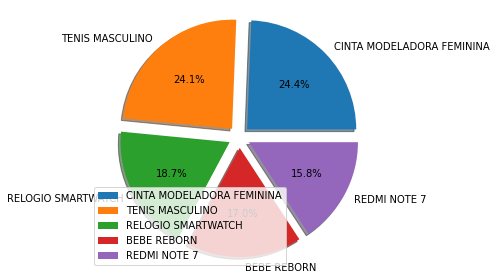

In [50]:
info = ['CINTA MODELADORA FEMININA', 'TENIS MASCULINO','RELOGIO SMARTWATCH', 'BEBE REBORN', 'REDMI NOTE 7']

EXATAS = [159, 157, 122, 111, 103]

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.1, 0.1,0.1,0.1,0.1)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(EXATAS, labels=info, autopct='%1.1f%%', shadow=True, explode=explode)


plt.legend(info,loc=3)

#Centraliza o gráfico
plt.axis('equal')
#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.show()

 * ### Análise 
          
          Os cinco produtos mais buscados na plataforma para serem compradodos no período foram cinta modeladora feminina, tênis masculino, Bebe Reborn,relógio smartwatch e Redmi note 7. 

### Buscas Por dia

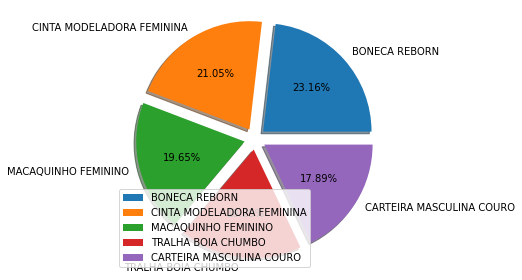

In [51]:
info_1 = ['BONECA REBORN', 'CINTA MODELADORA FEMININA','MACAQUINHO FEMININO', 'TRALHA BOIA CHUMBO', 'CARTEIRA MASCULINA COURO']

valor = [66, 60, 56, 52,51]

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(valor, labels=info_1, autopct='%2.2f%%', shadow=True, explode=explode)


plt.legend(info_1,loc=3)

#Centraliza o gráfico
plt.axis('equal')
#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.show()

 * ### Análise 
          
          Os cinco produtos mais buscados na plataforma para serem compradodos por dia foram Boneca Reborn, Cinta modeladora feminina, Macaquinho Feminino, Tralha Boia Chumbo e Carteira masculina couro.

### Buscas por hora

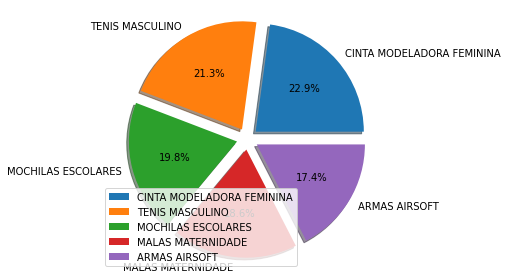

In [52]:
info_2 = ['CINTA MODELADORA FEMININA','TENIS MASCULINO','MOCHILAS ESCOLARES','MALAS MATERNIDADE', 'ARMAS AIRSOFT']

valor_1 = [59,55, 51, 48, 45]

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(valor_1, labels=info_2, autopct='%1.1f%%', shadow=True, explode=explode)


plt.legend(info_2,loc=3)

#Centraliza o gráfico
plt.axis('equal')
#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.show()

 * ### Análise 
          
          Os Cinco produtos mais buscados na plataforma para serem compradodos por hora foram tênis masculino, Cinta modelaroda feminina, Mochilas escolares, Malas maternidade e Armas Airsoft. 

### Buscar Por Dia e hora

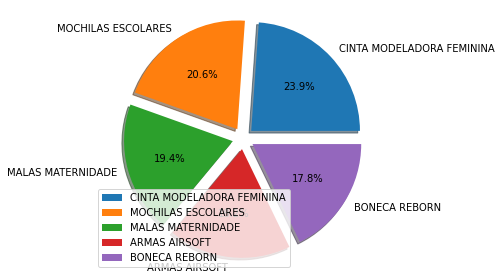

In [53]:
info_2 = ['CINTA MODELADORA FEMININA','MOCHILAS ESCOLARES','MALAS MATERNIDADE', 'ARMAS AIRSOFT', 'BONECA REBORN']

valor_1 = [59,51, 48, 45, 44]

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.1, 0.1, 0.1, 0.1, 0.1)

# define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(valor_1, labels=info_2, autopct='%1.1f%%', shadow=True, explode=explode)


plt.legend(info_2,loc=3)

#Centraliza o gráfico
plt.axis('equal')
#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()
plt.show()

#### Análise
    Os Cinco produtos mais buscados na plataforma para serem compradodos por hora foram  Cinta modelaroda feminina, Mochilas escolares, Malas maternidade, Armas Airsoft e Boneca Reborn.

#### Conclusão:

     Os produtos mais propensos a  serem comprados são Cinta modeladora feminina, tênis masculino e Boneca Reborn.
     

<AxesSubplot:xlabel='event_type_1', ylabel='Day'>

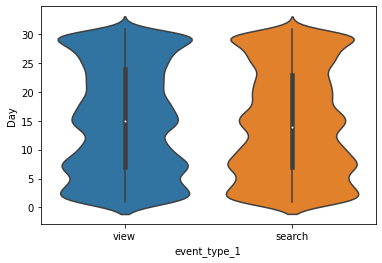

In [54]:
sns.violinplot(x='event_type_1', y='Day', data=train)

In [55]:
train.event_type_1.value_counts()

search    50180
view      49820
Name: event_type_1, dtype: Int64

In [56]:
 search = print(50180/100000*100, '%')

50.18 %


In [57]:
view = print(49820/100000*100, '%')

49.82 %


* #### Analise

      Consigo  verificar que 50 % das pessoas que entram na plataforma do mercado livre, entram  para consultar um produto específico para comprar  e os outros 49 % veem um determinado produto para compra, ou possível compra, atráves de uma recomendação de produtos da plataforma.

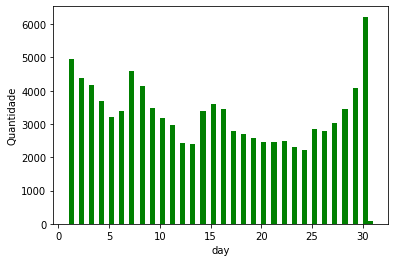

In [58]:
plt.hist(train['Day'], bins=60, color= 'Green')
plt.xlabel('day')
plt.ylabel('Quantidade')
plt.show()

In [59]:
train.Day.value_counts()

30    6225
1     4963
7     4608
2     4376
3     4179
8     4132
29    4096
4     3686
15    3616
9     3483
28    3457
16    3448
6     3393
14    3383
5     3220
10    3193
27    3023
11    2963
25    2843
17    2789
26    2789
18    2699
19    2580
22    2495
20    2469
21    2454
12    2414
13    2411
23    2300
24    2230
31      83
Name: Day, dtype: int64

In [60]:
dia_30 = print(2680/50699*100,'%')

5.286100317560504 %


In [61]:
dia_31 = print(22/50699*100, '%')

0.04339336081579519 %


* #### Analise
        
          Neste gráfico conseguimos ver a quantidade de visitas  realiazadas na plataforma do mercado livre no período, o dia mais acessado foi o dia 30. Tivemos um pequeno número de visitas no dia 31 que foi devido ao mês de outubro.

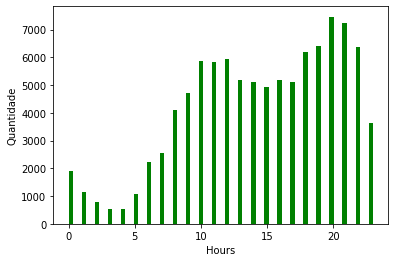

In [62]:
plt.hist(train['Hours'], bins=70, color= 'Green')
plt.xlabel('Hours')
plt.ylabel('Quantidade')
plt.show()

In [63]:
train.Hours.value_counts()

20    7462
21    7218
19    6424
22    6358
18    6197
12    5930
10    5851
11    5848
13    5194
16    5185
14    5123
17    5098
15    4912
9     4715
8     4095
23    3629
7     2561
6     2226
0     1912
1     1148
5     1072
2      784
3      534
4      524
Name: Hours, dtype: int64

* #### Analise
        
          Neste gráfico conseguimos ver o horário que as pessoas mais acessam a plataforma seria entre dez horas da manhã ao meio dia e depois após as oito horas da noite.

<AxesSubplot:xlabel='event_type_1', ylabel='Hours'>

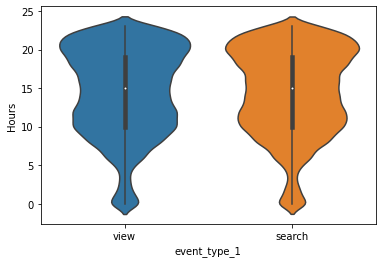

In [64]:
sns.violinplot(x='event_type_1', y='Hours', data=train)

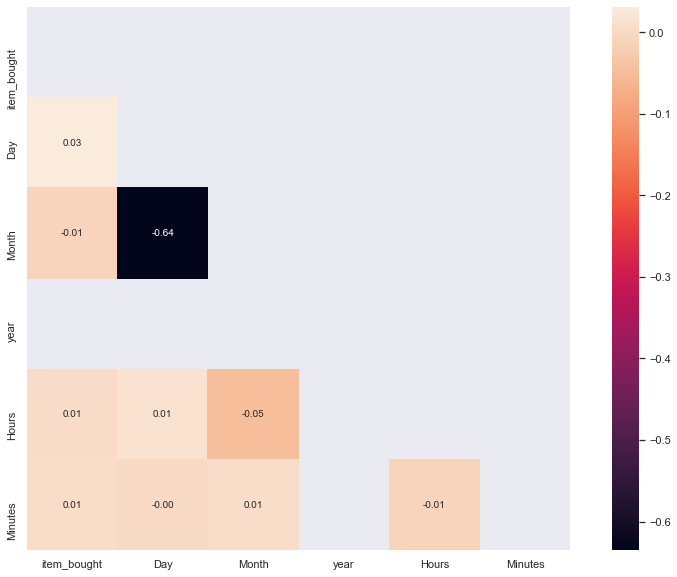

In [65]:
df_train_corr = train.corr()
sns.set(font_scale=1.0)
f, ax = plt.subplots(figsize=(15, 10))
mask = np.triu(np.ones_like(df_train_corr, dtype=bool))
hm = sns.heatmap(df_train_corr, 
                 mask=mask,
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df_train_corr.columns, 
                 xticklabels=df_train_corr.columns)

In [66]:
(df_train_corr*~mask).replace({0.0:np.nan}).round(2)

,item_bought,Day,Month,year,Hours,Minutes
item_bought,NaN,NaN,NaN,NaN,NaN,NaN
Day,0.03,NaN,NaN,NaN,NaN,NaN
Month,-0.01,-0.64,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN
Hours,0.01,0.01,-0.05,NaN,NaN,NaN
Minutes,0.01,-0.00,0.01,NaN,-0.01,NaN


## 3. Criação do Modelo

#### 3.1 Separando os dados para treino e teste

In [67]:
# importando a biblioteca encoder
from sklearn.preprocessing import LabelEncoder



In [68]:
le = LabelEncoder()

In [69]:
train_1_v = train.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [70]:
test_2 = test.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [71]:
train_3 = train_test.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [72]:
train_3.head()

,item_id,event_type_1,item_bought,Day,Month,year,Hours,Minutes
10252,49176,1,5114,4,0,0,12,19
10252,45222,1,5114,4,0,0,12,19
10252,45222,1,5114,4,0,0,2,18
10252,62881,0,5114,4,0,0,2,44
10252,12506,1,5114,4,0,0,2,46


In [73]:
id = train_1_v[['item_id','Month', 'Day','year','Hours','Minutes']]
id.head()

,item_id,Month,Day,year,Hours,Minutes
0,10812,0,10,0,3,18
0,10812,0,10,0,3,18
0,35106,0,10,0,3,19
0,8452,0,10,0,3,20
0,8452,0,10,0,3,21


In [74]:
id.shape

(100000, 6)

In [75]:
id_2 = train_3[['item_id','Month', 'Day','year','Hours','Minutes']]
id.head()

,item_id,Month,Day,year,Hours,Minutes
0,10812,0,10,0,3,18
0,10812,0,10,0,3,18
0,35106,0,10,0,3,19
0,8452,0,10,0,3,20
0,8452,0,10,0,3,21


In [76]:
id_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 10252 to 17156
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   item_id  200000 non-null  int32
 1   Month    200000 non-null  int32
 2   Day      200000 non-null  int32
 3   year     200000 non-null  int32
 4   Hours    200000 non-null  int32
 5   Minutes  200000 non-null  int32
dtypes: int32(6)
memory usage: 6.1 MB


In [77]:
test_1.head()

,item_id,event_type_1
0,1572239,view
0,1572239,view
0,1572239,view
0,1572239,view
0,1572239,view


In [78]:
id_1 = test_2[['item_id', 'Day', 'Month', 'year', 'Hours', 'Minutes']]
id_1.head()

,item_id,Day,Month,year,Hours,Minutes
0,34614,18,1,0,10,25
0,34614,18,1,0,10,29
0,34614,18,1,0,10,31
0,34614,18,1,0,10,32
0,34614,18,1,0,10,35


In [79]:
train.event_type_1.replace('view', 0, inplace=True )
train.event_type_1.replace('search', 1, inplace=True)

train.head()

,item_id,event_type_1,item_bought,Day,Month,year,Hours,Minutes
0,1786148,0,1748830,19,10,2019,11,25
0,1786148,0,1748830,19,10,2019,11,25
0,RELOGIO SMARTWATCH,1,1748830,19,10,2019,11,26
0,1615991,0,1748830,19,10,2019,11,27
0,1615991,0,1748830,19,10,2019,11,28


In [80]:
test.event_type_1.replace('view', 0, inplace=True )
test.event_type_1.replace('search', 1, inplace=True )

test.head()

,item_id,event_type_1,Day,Month,year,Hours,Minutes
0,1572239,0,26,9,2019,18,31
0,1572239,0,26,9,2019,18,35
0,1572239,0,26,9,2019,18,37
0,1572239,0,26,9,2019,18,38
0,1572239,0,26,9,2019,18,40


In [81]:
train_test.event_type_1.replace('view', 0, inplace=True )
train_test.event_type_1.replace('search', 1, inplace=True)

In [82]:
train_1.shape

(11999166, 3)

In [83]:
x_v1 = train[['item_bought', 'event_type_1']]
x_v1.head()

,item_bought,event_type_1
0,1748830,0
0,1748830,0
0,1748830,1
0,1748830,0
0,1748830,0


In [84]:
x_v1.shape

(100000, 2)

In [85]:
y_v1 = test[['event_type_1']]
y_v1.head()


,event_type_1
0,0
0,0
0,0
0,0
0,0


In [86]:
x_v3 = train_test[['item_bought', 'event_type_1']]
x_v3.head()

,item_bought,event_type_1
10252,806452,0
10252,806452,0
10252,806452,0
10252,806452,1
10252,806452,0


In [87]:
train = pd.concat([id, x_v1], axis=1)
train.head()

,item_id,Month,Day,year,Hours,Minutes,item_bought,event_type_1
0,10812,0,10,0,3,18,1748830,0
0,10812,0,10,0,3,18,1748830,0
0,35106,0,10,0,3,19,1748830,1
0,8452,0,10,0,3,20,1748830,0
0,8452,0,10,0,3,21,1748830,0


In [88]:
train_test = pd.concat([id_2, x_v3], axis=1)
train_test.head()

,item_id,Month,Day,year,Hours,Minutes,item_bought,event_type_1
10252,49176,0,4,0,12,19,806452,0
10252,45222,0,4,0,12,19,806452,0
10252,45222,0,4,0,2,18,806452,0
10252,62881,0,4,0,2,44,806452,1
10252,12506,0,4,0,2,46,806452,0


In [89]:
train = train[['item_id', 'event_type_1', 'Day', 'Month','year','Hours','Minutes','item_bought']]
train.head()

,item_id,event_type_1,Day,Month,year,Hours,Minutes,item_bought
0,10812,0,10,0,0,3,18,1748830
0,10812,0,10,0,0,3,18,1748830
0,35106,1,10,0,0,3,19,1748830
0,8452,0,10,0,0,3,20,1748830
0,8452,0,10,0,0,3,21,1748830


In [124]:
train_test = train_test[['item_id', 'event_type_1', 'Day', 'Month','year','Hours','Minutes','item_bought']]
train_test.head()

,item_id,event_type_1,Day,Month,year,Hours,Minutes,item_bought
10252,49176,0,4,0,0,12,19,806452
10252,45222,0,4,0,0,12,19,806452
10252,45222,0,4,0,0,2,18,806452
10252,62881,1,4,0,0,2,44,806452
10252,12506,0,4,0,0,2,46,806452


In [130]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 10252 to 17156
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   item_id       200000 non-null  int32
 1   event_type_1  200000 non-null  int64
 2   Day           200000 non-null  int32
 3   Month         200000 non-null  int32
 4   year          200000 non-null  int32
 5   Hours         200000 non-null  int32
 6   Minutes       200000 non-null  int32
 7   item_bought   200000 non-null  int64
dtypes: int32(6), int64(2)
memory usage: 9.2 MB


In [131]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 16693
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   item_id       500000 non-null  int32
 1   event_type_1  500000 non-null  int64
 2   Day           500000 non-null  int32
 3   Month         500000 non-null  int32
 4   year          500000 non-null  int32
 5   Hours         500000 non-null  int32
 6   Minutes       500000 non-null  int32
dtypes: int32(6), int64(1)
memory usage: 19.1 MB


In [93]:
test = pd.concat([id_1, y_v1], axis=1)
test.head()

,item_id,Day,Month,year,Hours,Minutes,event_type_1
0,34614,18,1,0,10,25,0
0,34614,18,1,0,10,29,0
0,34614,18,1,0,10,31,0
0,34614,18,1,0,10,32,0
0,34614,18,1,0,10,35,0


In [94]:
test = test[['item_id','event_type_1','Day','Month','year','Hours', 'Minutes']]
test.head()

,item_id,event_type_1,Day,Month,year,Hours,Minutes
0,34614,0,18,1,0,10,25
0,34614,0,18,1,0,10,29
0,34614,0,18,1,0,10,31
0,34614,0,18,1,0,10,32
0,34614,0,18,1,0,10,35


## separação dos dados para treino

In [95]:

compra = setup(data = train, target = 'item_bought',train_size=0.8, session_id=123,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                  log_experiment = True, experiment_name = 'Anomaly1')

,Description,Value
0,session_id,123
1,Target,item_bought
2,Original Data,"(100000, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(80000, 7)"


### Verificando os melhores modelos

In [96]:
best = compare_models( n_select = 3, fold=5)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,212507.3022,137767201045.8488,371149.3492,0.6132,0.6072,0.9109,5.0420
rf,Random Forest Regressor,244049.1527,142580700800.2694,377586.1097,0.5997,0.6424,1.1128,8.8940
dt,Decision Tree Regressor,248784.4628,257487727985.2364,507401.6461,0.2771,0.7958,0.9797,0.2340
knn,K Neighbors Regressor,355294.3250,258004592230.4000,507935.5000,0.2756,0.7935,1.6326,0.2760
xgboost,Extreme Gradient Boosting,421789.4625,262896146841.6000,512732.2000,0.2619,0.8558,2.0296,2.5520
catboost,CatBoost Regressor,445781.2499,284865042828.9440,533726.9186,0.2002,0.8839,2.2043,10.1920
lightgbm,Light Gradient Boosting Machine,472367.4732,311502245998.8467,558120.2541,0.1255,0.9159,2.3387,0.3080
gbr,Gradient Boosting Regressor,499744.8819,344278248117.9705,586749.6548,0.0334,0.9487,2.4939,2.7900
huber,Huber Regressor,512113.8150,357561989782.2254,597960.8216,-0.0038,0.9670,2.5784,1.4800
lr,Linear Regression,511793.5822,358999592334.3824,599162.0768,-0.0079,0.9617,2.5303,1.6280


#### Vamos verificar os 3 melhores modelos de acordo com a função que usamos n_select

In [97]:
type(best)

list

In [98]:
best

[PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                 max_depth=None, max_features='auto',
                                 max_leaf_nodes=None, max_samples=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=1,
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 n_jobs=-1, oob_score=False,
                                 power_transformer_method='box-cox',
                                 powe...
                                 regressor=ExtraTreesRegressor(bootstrap=False,
                                                               ccp_alpha=0.0,
                                                               criterion='mse',
                                                               max_depth=None,
               

Os três modelos melhores são:
* ExtraTreesRegressor 
* RandomForestRegressor
* DecisionTreeRegressor


### Criando os modelos

In [99]:

extra_tree = create_model(estimator='et', fold=5, cross_validation= True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,209205.7009,133559806658.1779,365458.3515,0.6225,0.5880,0.7912
1,211805.6299,136512292469.7891,369475.6994,0.6219,0.6064,0.8854
2,212011.8052,136771269141.2337,369825.9985,0.6149,0.6301,1.0564
3,213760.4207,140221740545.7704,374461.9347,0.6059,0.6002,0.8564
4,215752.9541,141770896414.2731,376524.7620,0.6008,0.6113,0.9651
Mean,212507.3022,137767201045.8488,371149.3492,0.6132,0.6072,0.9109
SD,2179.1280,2909404893.9988,3919.3903,0.0086,0.0139,0.0917


* Aqui o modelo já deu uma pequena melhorada

In [100]:


 Reandom_forest =  create_model(estimator= 'rf', fold=5, cross_validation= True )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,239545.2388,138706196918.3598,372432.8086,0.6080,0.6254,0.9721
1,243935.2985,142042906494.2416,376885.8003,0.6066,0.6456,1.0585
2,244435.9974,142247833979.3682,377157.5718,0.5995,0.6645,1.2253
3,246261.7884,145187579968.3146,381034.8803,0.5919,0.6348,1.1167
4,246067.4404,144718986641.0630,380419.4877,0.5925,0.6417,1.1911
Mean,244049.1527,142580700800.2694,377586.1097,0.5997,0.6424,1.1128
SD,2425.5760,2314298541.7060,3070.9165,0.0068,0.0130,0.0912


In [101]:

 decision_tree =  create_model(estimator= 'dt', fold=5, cross_validation= True, round=2 )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,246968.23,254665500141.63,504643.93,0.28,0.79,0.88
1,253280.00,262713100871.63,512555.46,0.27,0.81,1.04
2,243147.03,250585664594.74,500585.32,0.29,0.79,1.16
3,254696.16,265596151339.80,515360.22,0.25,0.80,0.91
4,245830.89,253878222978.39,503863.30,0.29,0.79,0.91
Mean,248784.46,257487727985.24,507401.65,0.28,0.80,0.98
SD,4448.84,5686528405.64,5594.42,0.01,0.01,0.10


### Prediction Error Plot

Extra Tree

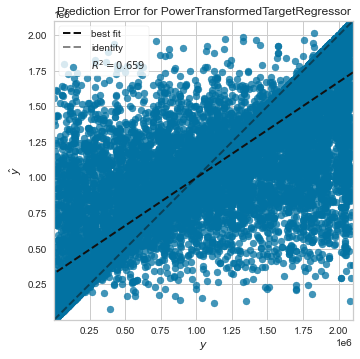

In [102]:
plot_model(extra_tree, plot = 'error')


###  Features Importantes

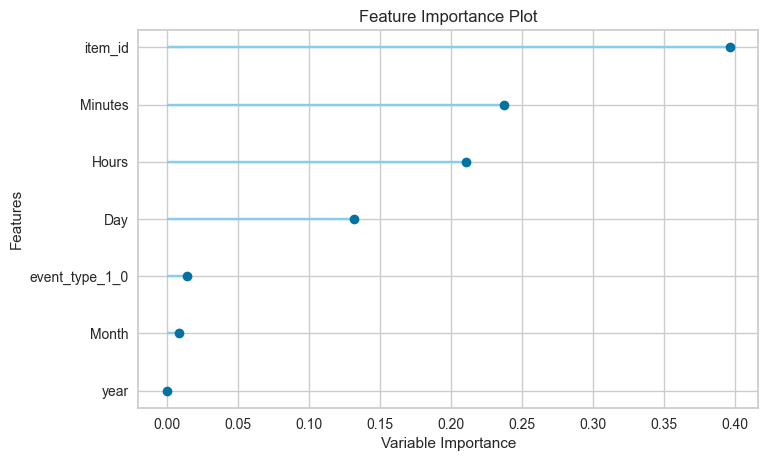

In [103]:

plot_model(extra_tree, plot='feature' )

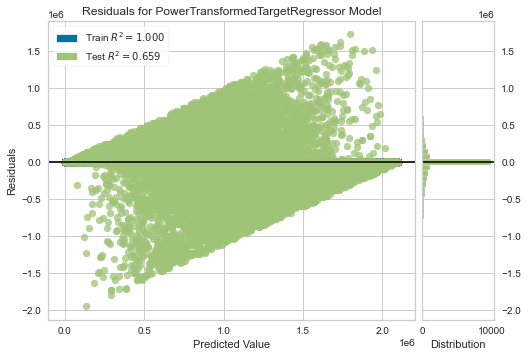

In [104]:
plot_model(extra_tree, plot ='residuals', fold=5)

#### Interpretando as features, importância para o modelo

### Verificando a performance do modelo

In [105]:
predicao_tree = predict_model(extra_tree)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,189818.5631,120565035585.8408,347224.7623,0.6592,0.5566,0.7842


In [106]:
predicao_random = predict_model(Reandom_forest)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,217961.0939,124252383190.1340,352494.5151,0.6488,0.5896,0.9205


### Ajustando os Hiperparâmetro 

In [109]:
tuned_tree = tune_model(extra_tree, n_iter = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,509302.5903,356009190084.9548,596665.0569,-0.0094,0.9415,2.2819
1,511256.3325,357700384800.6440,598080.5839,-0.0079,0.9542,2.3991
2,518674.6690,366207329498.9430,605150.6668,-0.0083,0.9817,2.5473
3,515498.8728,361821097644.9268,601515.6670,-0.0079,0.9712,2.4510
4,504334.4831,349222502750.4085,590950.5079,-0.0066,0.9583,2.4289
5,518694.0425,367275366984.2480,606032.4801,-0.0108,0.9863,2.6708
6,517773.9570,363762709678.1700,603127.4407,-0.0104,0.9440,2.5565
7,506919.3989,352708336296.2868,593892.5292,-0.0040,0.9646,2.3791
8,506845.3878,354322064445.4932,595249.5816,-0.0117,0.9479,2.8683
9,517646.2667,364938598560.0432,604101.4803,-0.0137,0.9689,2.7341


#####  * Não foi possível aplicar uma quantidade maior de  n_iter, pois a máquina não roda, fica lenta. Com uma quantidade pequena de interações o ajuste só danifica o modelo.

#### Finalizando o modelo 
      Criando o modelo final 

In [110]:
final_extra_tree = finalize_model(extra_tree)
final_extra_tree

PowerTransformedTargetRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                powe...
                                regressor=ExtraTreesRegressor(bootstrap=False,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                             

<h5>Avaliando a performance do modelo final </h5>

In [135]:
final_modelo =  predict_model(final_extra_tree)

final_modelo.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.4126,0.2283,0.4778,1.0000,0.0000,0.0000


,item_id,Day,Month,year,Hours,Minutes,event_type_1_0,item_bought,Label
0,16370,19,1,0,13,15,1.0,963678.0,9.636776e+05
1,1415,21,0,0,1,14,1.0,1105872.0,1.105872e+06
2,18510,18,1,0,15,45,1.0,1361154.0,1.361154e+06
3,25250,5,0,0,14,43,1.0,94443.0,9.444298e+04
4,21639,28,0,0,16,48,1.0,1810991.0,1.810990e+06


In [136]:
check_metric(final_modelo.item_bought, final_modelo.Label, 'R2')

1.0

### Salvando o modelo Para colocar em produção

      A função embutida save_model () do PyCaret permite que você salve o modelo junto com o pipeline de transformação  para uso posterior, ou seja, não precisa rodar todo processo novamente

In [112]:
save_model(final_extra_tree,'Final previsão proxima compra 27Nov2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='item_bought', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                                                                                ccp_alpha=0.0,
                                                                                criterion='mse',
                                                                                max_depth=None,
                         

### Carregando o Modelo Salvo
       Conseguimos aplicar facilmente o modelo salvo em dados futuros para previsão, carregando em um mesmo ambiente ou ambiente alternativo

In [114]:
salved_final_extra_tree = load_model('Final previsão proxima compra 27Nov2020')

Transformation Pipeline and Model Successfully Loaded


#####  Salvando o modelo em formato csv

In [137]:
lista = list()

In [138]:
lista_1 = list()

In [139]:
lista = list(new_prediction.Label)

In [140]:
lista_1 = list(new_prediction.Label)

In [141]:
n =19674

sublista = []
lista_l = len(lista)
for i in range(n):
    start = int(i*lista_l/n)
    end = int((i+1)*lista_l/n)
    sublista.append(lista[start:end])

In [143]:
Submission = pd.DataFrame(sublista, dtype=int)

In [ ]:
Submission.head()

In [144]:
Submission.shape

(19674, 11)

In [146]:
Submission.to_csv('submission_v1.csv', sep=',', encoding='utf-8', header=False, index=None)

In [147]:
Submission.head()


,0,1,2,3,4,5,6,7,8,9,10
0,4.085464e+05,4.085464e+05,9.639055e+05,1.338924e+06,1.532605e+06,1.439790e+06,1.021395e+06,1.222828e+06,1.222828e+06,1.631013e+06,NaN
1,1.315785e+06,1.407040e+06,1.562939e+06,1.356535e+06,1.560962e+06,1.867155e+06,1.492561e+06,1.494928e+06,1.220160e+06,1.508832e+06,NaN
2,9.643127e+05,1.508287e+06,1.256229e+06,9.988197e+05,8.860495e+05,9.214728e+05,1.100395e+06,1.110359e+06,5.108463e+05,7.928202e+05,NaN
3,7.928202e+05,8.929345e+05,9.793220e+05,9.494694e+05,1.020960e+06,1.521809e+06,1.521809e+06,1.235349e+06,1.235349e+06,1.523196e+06,NaN
4,1.523196e+06,1.523196e+06,1.124555e+06,1.523196e+06,1.410474e+06,1.410474e+06,1.135930e+06,1.410474e+06,1.109379e+06,1.336120e+06,NaN
